In [1]:
import numpy as np
import pandas as pd
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
SEED = 5
np.random.seed(SEED)

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')
data = pd.read_csv('/kaggle/input/titanic/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Quase 80% dos dados da coluna cabine são nulos, então não usarei no modelo. Uma pequena parte das idades também é nula, mas transformaremos

In [4]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
media2 = test_data['Age'].mean()
test_data['Age'].fillna(media2, inplace=True)
media_fare = test_data['Fare'].mean()
test_data['Fare'].fillna(media_fare, inplace=True)

media1 = data['Age'].mean()
data['Age'].fillna(media1, inplace=True)
data['Embarked'].fillna('S', inplace=True)

In [7]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [8]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [9]:
X_exercicio = X = test_data[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
X = data[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
y = data['Survived']
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [10]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [11]:
colunas = X.columns
one_hot = make_column_transformer((
    OneHotEncoder(drop = 'if_binary'),
    ['Sex', 'Embarked']),
    remainder = 'passthrough',
    sparse_threshold = 0
    )

In [12]:
X_exercicio = one_hot.fit_transform(X_exercicio)
X = one_hot.fit_transform(X)
one_hot.get_feature_names_out(colunas)

array(['onehotencoder__Sex_male', 'onehotencoder__Embarked_C',
       'onehotencoder__Embarked_Q', 'onehotencoder__Embarked_S',
       'remainder__Pclass', 'remainder__Age', 'remainder__SibSp',
       'remainder__Parch', 'remainder__Fare'], dtype=object)

In [13]:
pd.DataFrame(X, columns = one_hot.get_feature_names_out(colunas))

,onehotencoder__Sex_male,onehotencoder__Embarked_C,onehotencoder__Embarked_Q,onehotencoder__Embarked_S,remainder__Pclass,remainder__Age,remainder__SibSp,remainder__Parch,remainder__Fare
0,1.0,0.0,0.0,1.0,3.0,22.000000,1.0,0.0,7.2500
1,0.0,1.0,0.0,0.0,1.0,38.000000,1.0,0.0,71.2833
2,0.0,0.0,0.0,1.0,3.0,26.000000,0.0,0.0,7.9250
3,0.0,0.0,0.0,1.0,1.0,35.000000,1.0,0.0,53.1000
4,1.0,0.0,0.0,1.0,3.0,35.000000,0.0,0.0,8.0500
...,...,...,...,...,...,...,...,...,...
886,1.0,0.0,0.0,1.0,2.0,27.000000,0.0,0.0,13.0000
887,0.0,0.0,0.0,1.0,1.0,19.000000,0.0,0.0,30.0000
888,0.0,0.0,0.0,1.0,3.0,29.699118,1.0,2.0,23.4500
889,1.0,1.0,0.0,0.0,1.0,26.000000,0.0,0.0,30.0000


In [14]:
pd.DataFrame(X_exercicio, columns = one_hot.get_feature_names_out(colunas))

,onehotencoder__Sex_male,onehotencoder__Embarked_C,onehotencoder__Embarked_Q,onehotencoder__Embarked_S,remainder__Pclass,remainder__Age,remainder__SibSp,remainder__Parch,remainder__Fare
0,1.0,0.0,1.0,0.0,3.0,34.50000,0.0,0.0,7.8292
1,0.0,0.0,0.0,1.0,3.0,47.00000,1.0,0.0,7.0000
2,1.0,0.0,1.0,0.0,2.0,62.00000,0.0,0.0,9.6875
3,1.0,0.0,0.0,1.0,3.0,27.00000,0.0,0.0,8.6625
4,0.0,0.0,0.0,1.0,3.0,22.00000,1.0,1.0,12.2875
...,...,...,...,...,...,...,...,...,...
413,1.0,0.0,0.0,1.0,3.0,30.27259,0.0,0.0,8.0500
414,0.0,1.0,0.0,0.0,1.0,39.00000,0.0,0.0,108.9000
415,1.0,0.0,0.0,1.0,3.0,38.50000,0.0,0.0,7.2500
416,1.0,0.0,0.0,1.0,3.0,30.27259,0.0,0.0,8.0500


In [15]:
treino_x, teste_x, treino_y, teste_y = train_test_split(X, y, test_size = 0.25, stratify = y)

print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

Treinaremos com 668 elementos e testaremos com 223 elementos


In [16]:
dummy = DummyClassifier()
dummy.fit(treino_x, treino_y)

dummy.score(teste_x, teste_y)

0.6143497757847534

In [17]:
linear = LinearSVC()
linear.fit(treino_x, treino_y)

linear.score(teste_x, teste_y)

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.7757847533632287

In [18]:
arvore = DecisionTreeClassifier(max_depth=4)
arvore.fit(treino_x, treino_y)

arvore.score(teste_x, teste_y)

0.8340807174887892

# Tentei setar o nome das features criando uma lista com cada feature name, mas não deu certo, deu um bug que não consegui resolver. Então criei o diagrama das decisões sem o feature_names

[Text(0.5089285714285714, 0.9, 'x[0] <= 0.5\ngini = 0.473\nsamples = 668\nvalue = [412, 256]\nclass = Não'),
 Text(0.2857142857142857, 0.7, 'x[4] <= 2.5\ngini = 0.385\nsamples = 234\nvalue = [61, 173]\nclass = Sim'),
 Text(0.14285714285714285, 0.5, 'x[5] <= 2.5\ngini = 0.102\nsamples = 130\nvalue = [7, 123]\nclass = Sim'),
 Text(0.07142857142857142, 0.3, 'x[8] <= 88.775\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = Não'),
 Text(0.03571428571428571, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Sim'),
 Text(0.10714285714285714, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Não'),
 Text(0.21428571428571427, 0.3, 'x[8] <= 26.125\ngini = 0.089\nsamples = 128\nvalue = [6, 122]\nclass = Sim'),
 Text(0.17857142857142858, 0.1, 'gini = 0.201\nsamples = 44\nvalue = [5, 39]\nclass = Sim'),
 Text(0.25, 0.1, 'gini = 0.024\nsamples = 84\nvalue = [1, 83]\nclass = Sim'),
 Text(0.42857142857142855, 0.5, 'x[8] <= 22.904\ngini = 0.499\nsamples = 104\nvalue = [54, 50]\nclass = Não'),

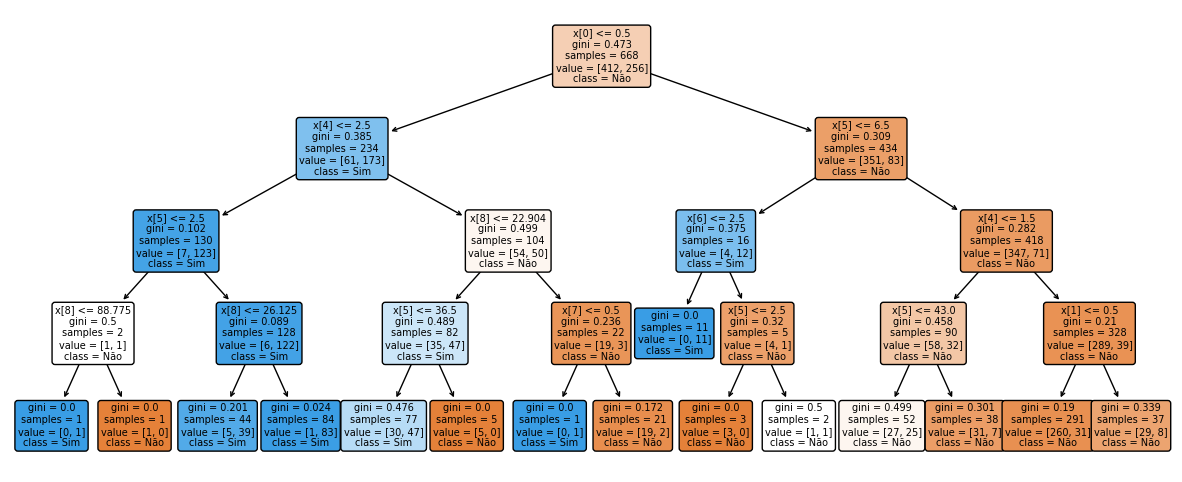

In [19]:
plt.figure(figsize = (15, 6))
plot_tree(arvore, filled = True, class_names = ['Não', 'Sim'], fontsize = 7, rounded = True)

In [20]:
normalizacao = MinMaxScaler()
x_treino_normalizado = normalizacao.fit_transform(treino_x)


pd.DataFrame(x_treino_normalizado)

,0,1,2,3,4,5,6,7,8
0,1.0,1.0,0.0,0.0,1.0,0.365929,0.000,0.000000,0.014110
1,1.0,0.0,0.0,1.0,0.0,0.470566,0.125,0.000000,0.175668
2,0.0,0.0,1.0,0.0,1.0,0.365929,0.000,0.333333,0.015127
3,0.0,0.0,0.0,1.0,0.0,0.432749,0.125,0.000000,0.162932
4,1.0,0.0,0.0,1.0,1.0,0.357116,0.000,0.000000,0.015371
...,...,...,...,...,...,...,...,...,...
663,1.0,0.0,0.0,1.0,1.0,0.365929,0.000,0.000000,0.015835
664,0.0,0.0,1.0,0.0,1.0,0.365929,0.000,0.000000,0.015127
665,0.0,1.0,0.0,0.0,0.5,0.331905,0.125,0.000000,0.027050
666,1.0,0.0,0.0,1.0,0.5,0.256271,0.125,0.000000,0.022447


In [21]:
knn = KNeighborsClassifier(metric='euclidean')

knn.fit(x_treino_normalizado, treino_y)

x_teste_normalizado = normalizacao.transform(teste_x)

In [22]:
knn.score(x_teste_normalizado, teste_y)

0.7757847533632287

In [23]:
print(f'A acurácia do dataset de treino do modelo Dummy é: {dummy.score(teste_x, teste_y)}')
print(f'A acurácia do dataset de treino do modelo árvore é: {arvore.score(teste_x, teste_y)}')
print(f'A acurácia do dataset de treino do modelo KNN é: {knn.score(x_teste_normalizado, teste_y)}')
print(f'A acurácia do dataset de treino do modelo linearSVC é: {linear.score(teste_x, teste_y)}')

A acurácia do dataset de treino do modelo Dummy é: 0.6143497757847534
A acurácia do dataset de treino do modelo árvore é: 0.8340807174887892
A acurácia do dataset de treino do modelo KNN é: 0.7757847533632287
A acurácia do dataset de treino do modelo linearSVC é: 0.7757847533632287


In [24]:
prediction_arvore = arvore.predict(teste_x)
prediction_knn = knn.predict(teste_x)
prediction_linearSVC = linear.predict(teste_x)

In [25]:
print(f'Matriz de confusão do modelo Árvore:\n{confusion_matrix(teste_y, prediction_arvore)}')
print(f'Matriz de confusão do modelo KNN:\n{confusion_matrix(teste_y, prediction_knn)}')
print(f'Matriz de confusão do modelo linear SVC:\n{confusion_matrix(teste_y, prediction_linearSVC)}')


Matriz de confusão do modelo Árvore:
[[123  14]
 [ 23  63]]
Matriz de confusão do modelo KNN:
[[82 55]
 [26 60]]
Matriz de confusão do modelo linear SVC:
[[105  32]
 [ 18  68]]


In [26]:
print(f'Acurácia do modelo Árvore:\n{accuracy_score(teste_y, prediction_arvore)}')
print(f'Acurácia do modelo KNN:\n{accuracy_score(teste_y, prediction_knn)}')
print(f'Acurácia do modelo linear SVC:\n{accuracy_score(teste_y, prediction_linearSVC)}')

Acurácia do modelo Árvore:
0.8340807174887892
Acurácia do modelo KNN:
0.6367713004484304
Acurácia do modelo linear SVC:
0.7757847533632287


In [27]:
print(f'Precisão do modelo Árvore:\n{precision_score(teste_y, prediction_arvore)}')
print(f'Precisão do modelo KNN:\n{precision_score(teste_y, prediction_knn)}')
print(f'Precisão do modelo linear SVC:\n{precision_score(teste_y, prediction_linearSVC)}')

Precisão do modelo Árvore:
0.8181818181818182
Precisão do modelo KNN:
0.5217391304347826
Precisão do modelo linear SVC:
0.68


In [28]:
print(f'O Recall do modelo Árvore:\n{recall_score(teste_y, prediction_arvore)}')
print(f'O Recall do modelo KNN:\n{recall_score(teste_y, prediction_knn)}')
print(f'O Recall do modelo linear SVC:\n{recall_score(teste_y, prediction_linearSVC)}')

O Recall do modelo Árvore:
0.7325581395348837
O Recall do modelo KNN:
0.6976744186046512
O Recall do modelo linear SVC:
0.7906976744186046


In [29]:
prediction = linear.predict(X_exercicio)
prediction

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [30]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': prediction})
output.to_csv('submission1.csv', index=False)